In [16]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from common.util import smooth_curve
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
from common.optimizer import *

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [11]:
#옵티마이저 설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

In [14]:
#각 옵티마이저별로 네트워크 만들기
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = TwoLayerNet(
        input_size=784, hidden_size=50,
        output_size=10)
    train_loss[key] = []   

In [15]:
#훈련
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.3027830960597493
Momentum:2.3019573431539317
AdaGrad:2.230899843978645
Adam:2.2951470032395043
===========iteration:100===========
SGD:2.297216814909364
Momentum:1.704334802699373
AdaGrad:0.39135407545165324
Adam:0.5508466766234142
===========iteration:200===========
SGD:2.2843207823199863
Momentum:0.46011879474697653
AdaGrad:0.23803996108225406
Adam:0.28383218438639124
===========iteration:300===========
SGD:2.2593086617417852
Momentum:0.3853123601380249
AdaGrad:0.286126393772134
Adam:0.315658429007571
===========iteration:400===========
SGD:2.229144340866931
Momentum:0.3096737226993295
AdaGrad:0.22453449073421386
Adam:0.22798409212970508
===========iteration:500===========
SGD:2.1472244696023157
Momentum:0.2864634346568823
AdaGrad:0.23289632717534733
Adam:0.2255126318771033
===========iteration:600===========
SGD:1.9596731783701733
Momentum:0.3744276613810942
AdaGrad:0.3537948634625922
Adam:0.333942885834532
===========iteration:700===========


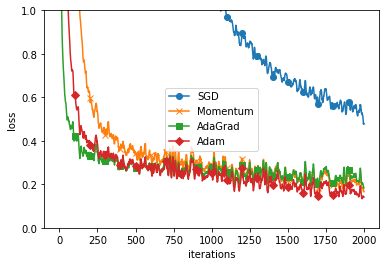

In [17]:
# 그래프 그리기
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"} #색깔
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
#Adam과 Adagrad가 가장 좋은 성능을 보인다. 상황에 맞게 둘 중 하나를 고르면 최적의 결과를 기대할 수 있을 것이다.